In [1]:
from neural_lam.datastore import init_datastore

datastore_kind = 'mdp'
config_path = '/era_test/era_test.datastore.yaml'

datastore = init_datastore(
        datastore_kind=datastore_kind,
        config_path = config_path,
    )

2025-06-06 11:43:58.047 | INFO     | mllam_data_prep.create_dataset:create_dataset:160 - Loading dataset era_variables from C:\github\operational-weather\era_test\sagnn_2020.nc
2025-06-06 11:43:58.120 | INFO     | mllam_data_prep.create_dataset:create_dataset:174 - Extracting selected variables from dataset era_variables
2025-06-06 11:43:58.120 | INFO     | mllam_data_prep.create_dataset:create_dataset:220 - Mapping dimensions and variables for dataset era_variables to state
2025-06-06 11:43:58.935 | INFO     | mllam_data_prep.create_dataset:create_dataset:160 - Loading dataset era_times from C:\github\operational-weather\era_test\sagnn_2020.nc
2025-06-06 11:43:58.935 | INFO     | mllam_data_prep.create_dataset:create_dataset:174 - Extracting selected variables from dataset era_times
2025-06-06 11:43:58.935 | INFO     | mllam_data_prep.create_dataset:create_dataset:220 - Mapping dimensions and variables for dataset era_times to forcing
2025-06-06 11:43:59.335 | INFO     | mllam_data_pr

The loaded datastore contains the following features:
 state   : u850.0hPa v850.0hPa
 forcing : hour month
 static  : lsm
With the following splits (over time):
 train   : 2020-01-01T00:00 to 2020-10-31T21:00
 val     : 2019-11-01T00:00 to 2019-11-02T21:00
 test    : 2020-11-03T00:00 to 2020-12-31T21:00


In [2]:
datastore._ds

<xarray.Dataset> Size: 2GB
Dimensions:                         (forcing_feature: 2, time: 11688,
                                     grid_index: 6400, split_name: 3,
                                     split_part: 2, state_feature: 4,
                                     static_feature: 1)
Coordinates: (12/17)
  * forcing_feature                 (forcing_feature) <U5 40B 'hour' 'month'
    forcing_feature_long_name       (forcing_feature) <U1 8B dask.array<chunksize=(2,), meta=np.ndarray>
    forcing_feature_source_dataset  (forcing_feature) <U9 72B dask.array<chunksize=(2,), meta=np.ndarray>
    forcing_feature_units           (forcing_feature) <U1 8B dask.array<chunksize=(2,), meta=np.ndarray>
  * split_name                      (split_name) <U5 60B 'train' 'val' 'test'
  * split_part                      (split_part) <U5 40B 'start' 'end'
    ...                              ...
    static_feature_long_name        (static_feature) <U1 4B dask.array<chunksize=(1,), meta=np.ndarray>
    static_feature_source_dataset   (static_feature) <U7 28B dask.array<chunksize=(1,), meta=np.ndarray>
    static_feature_units            (static_feature) <U1 4B dask.array<chunksize=(1,), meta=np.ndarray>
  * time                            (time) datetime64[ns] 94kB 2017-01-01 ......
    x                               (grid_index) float64 51kB dask.array<chunksize=(6400,), meta=np.ndarray>
    y                               (grid_index) float64 51kB dask.array<chunksize=(6400,), meta=np.ndarray>
Dimensions without coordinates: grid_index
Data variables: (12/14)
    forcing                         (forcing_feature, time, grid_index) int64 1GB dask.array<chunksize=(2, 1, 6400), meta=np.ndarray>
    forcing__train__diff_mean       (forcing_feature) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    forcing__train__diff_std        (forcing_feature) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    forcing__train__mean            (forcing_feature) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    forcing__train__std             (forcing_feature) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    splits                          (split_name, split_part) <U16 384B dask.array<chunksize=(3, 2), meta=np.ndarray>
    ...                              ...
    state__train__diff_std          (state_feature) float32 16B dask.array<chunksize=(4,), meta=np.ndarray>
    state__train__mean              (state_feature) float32 16B dask.array<chunksize=(4,), meta=np.ndarray>
    state__train__std               (state_feature) float32 16B dask.array<chunksize=(4,), meta=np.ndarray>
    static                          (static_feature, grid_index) float64 51kB dask.array<chunksize=(1, 6400), meta=np.ndarray>
    static__train__mean             (static_feature) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    static__train__std              (static_feature) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    created_on:       2025-03-07T08:16:49
    created_with:     mllam-data-prep (https://github.com/mllam/mllam-data-prep)
    dataset_version:  v0.1.0
    mdp_version:      v0.5.0
    schema_version:   v0.5.0

In [11]:
datastore._ds['static'].values.shape

(1, 6400)

In [6]:
# Print all data variables for datastore.ds_

for var in datastore._ds.data_vars:
    print(var)
    print(datastore._ds[var].shape)
    print(datastore._ds[var].dtype)
    print('')

forcing
(2, 11688, 6400)
int64

forcing__train__diff_mean
(2,)
float64

forcing__train__diff_std
(2,)
float64

forcing__train__mean
(2,)
float64

forcing__train__std
(2,)
float64

splits
(3, 2)
<U16

state
(11688, 4, 6400)
float32

state__train__diff_mean
(4,)
float32

state__train__diff_std
(4,)
float32

state__train__mean
(4,)
float32

state__train__std
(4,)
float32

static
(1, 6400)
float64

static__train__mean
(1,)
float64

static__train__std
(1,)
float64



# Understanding datastores

In [9]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import cartopy.crs as ccrs

from IPython.display import HTML

from neural_lam.config import load_config_and_datastore


config_path = '/teamspace/studios/this_studio/dk-neural-lam/era5/config.yaml'
config, datastore = load_config_and_datastore(config_path=config_path)


def plot_example(datastore, seed: int = 0, windows: int = 7, varialbe: int = 0, frame_rate: int = 16, levels: int = 10) -> HTML:
    time_ = slice(seed, seed + windows)
    states = datastore.unstack_grid_coords(datastore._ds["state"].isel(time=time_, state_feature=varialbe))
    
    lon, lat = states.coords['x'], states.coords['y']
        
    bounds = [lon.min().item(), lon.max().item(), lat.min().item(), lat.max().item()]
    
    time_states = states.time.values

    fig, ax = plt.subplots(1, 1, figsize=(14, 7), subplot_kw={'projection': ccrs.PlateCarree()})

    vmin = states.values.min()
    vmax = states.values.max()

    fig.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9, wspace=0.2)

    print('States:', states.shape)

    ax.set_extent(bounds, crs=ccrs.PlateCarree())
    ax.coastlines()

    stat = ax.contourf(lon, lat, states[0].transpose('y', 'x'), levels=levels, vmin=vmin, vmax = vmax, transform=ccrs.PlateCarree())
    ax.set_title(f'Window {0} - {time_states[0]}')

    fig.colorbar(stat, ax=ax, orientation='vertical', label='Wind Speed (m/s)')

    def animate(i):
        ax.clear()
        ax.coastlines()

        ax.contourf(lon, lat, states[i].transpose('y', 'x'), levels=levels, vmin=vmin, vmax = vmax)

        ax.set_title(f'Window {i} - {time_states[i]}') # .strftime("%Y-%m-%d %H:%M:%S")
            
    frames = states.shape[0]

    interval = 1000 / frame_rate

    ani = FuncAnimation(fig, animate, frames=frames, interval=interval)

    plt.close(fig)

    return HTML(ani.to_jshtml())


plot_example(datastore, seed=1, windows=7, frame_rate=3, levels=10)

The loaded datastore contains the following features:
 state   : wind_speed850.0hPa
 forcing : hour month
 static  : lsm
With the following splits (over time):
 train   : 2010-01-01T00:00 to 2017-06-01T00:00
 val     : 2017-07-01T00:00 to 2018-11-01T00:00
 test    : 2018-12-01T00:00 to 2019-12-31T00:00
States: (7, 69, 49)


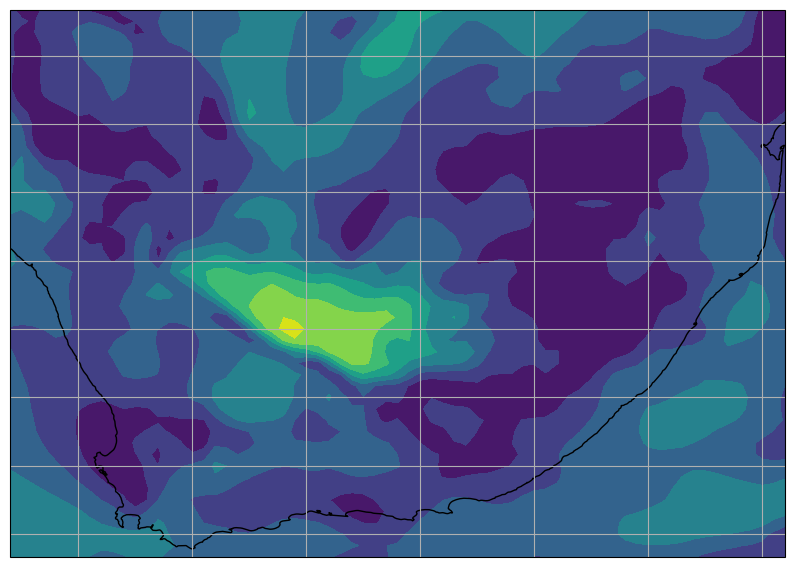

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

time_ =0
varialbe = 6

unstacked = datastore.unstack_grid_coords(datastore._ds["state"].isel(time=time_, state_feature=varialbe))

lon, lat = unstacked.coords['x'], unstacked.coords['y']
# Transpose the data array to match the shape of the coordinates
unstacked = unstacked.transpose('y', 'x')

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.contourf(lon, lat, unstacked.values, transform=ccrs.PlateCarree())

plt.show()

In [1]:
from neural_lam.config import load_config_and_datastore


config_path = 'C:/Users/23603526/Documents/GitHub/neural-lam-Divan/era5_2020/test_config.yaml'
config, datastore = load_config_and_datastore(config_path=config_path)

The loaded datastore contains the following features:
 state   : z850.0hPa r850.0hPa t850.0hPa u850.0hPa v850.0hPa w850.0hPa wind_speed850.0hPa
 forcing : hour month
 static  : lsm
With the following splits (over time):
 train   : 2020-01-01T00:00 to 2020-01-01T00:00
 val     : 2020-01-01T00:00 to 2020-01-01T00:00
 test    : 2020-01-01T00:00 to 2020-12-31T00:00


c:\Users\23603526\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [1]:
datastore._ds

NameError: name 'datastore' is not defined

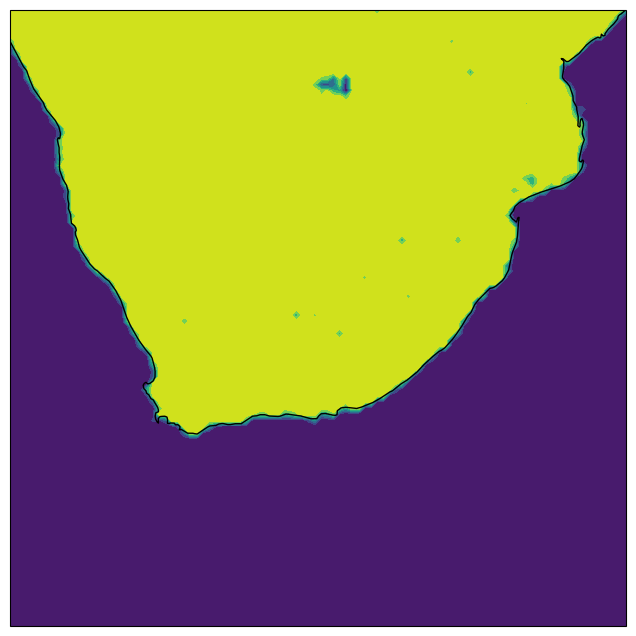

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

ds = xr.open_dataset('/teamspace/studios/this_studio/dk-neural-lam/era5_large/era_2017_2020_large.nc')
lsm = xr.open_dataset('/teamspace/studios/this_studio/dk-neural-lam/era5_large/land_sea_mask.nc')

# Match the coordinates of the land-sea mask to the data

lat, lon = ds['y'], ds['x']

lsm = lsm.sel(latitude=lat, longitude=lon, method='nearest')

# On the x and y coordinates of the data, add the land-sea mask as a new variable
ds['lsm'] = (('x', 'y'), lsm['lsm'].isel(time=0).values)

ds = ds.isel(x=slice(10, 110), y=slice(10, 110))


time_ += 1

unstacked = ds["lsm"]#.isel(time=time_)
unstacked.shape

lon, lat = unstacked.coords['x'], unstacked.coords['y']

# # Transpose the data array to match the shape of the coordinates
# unstacked = unstacked.transpose('y', 'x')

fig = plt.figure(figsize=(10, 8))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()


ax.contourf(lon, lat, unstacked.values.squeeze(), transform=ccrs.PlateCarree())   

plt.show()

ds.to_netcdf('era5_100x100.nc')

In [2]:
import xarray as xr

ds = xr.open_dataset('/era_test/sagnn_2020.nc')
ds

<xarray.Dataset> Size: 675MB
Dimensions:         (time: 2928, pressure_level: 1, y: 80, x: 80)
Coordinates:
  * time            (time) datetime64[ns] 23kB 2020-01-01 ... 2020-12-31T21:0...
  * pressure_level  (pressure_level) float64 8B 850.0
  * y               (y) float64 640B -38.75 -38.5 -38.25 ... -19.5 -19.25 -19.0
  * x               (x) float64 640B 15.0 15.25 15.5 15.75 ... 34.25 34.5 34.75
Data variables:
    z               (time, pressure_level, y, x) float32 75MB ...
    r               (time, pressure_level, y, x) float32 75MB ...
    t               (time, pressure_level, y, x) float32 75MB ...
    u               (time, pressure_level, y, x) float32 75MB ...
    v               (time, pressure_level, y, x) float32 75MB ...
    hour            (time, x, y) int64 150MB ...
    month           (time, x, y) int64 150MB ...
    lsm             (x, y) float64 51kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-25T10:14 GRIB to CDM+CF via cfgrib-0.9.1...